# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


# Preprocessing the data

In [4]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

**We can notice here that there's NAN values in the data**

In [6]:
ford.duplicated().sum()

0

In [7]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**There is a big differnce between mean and min and max in duration_sec and start_station_id**

In [8]:
ford.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

# Cleaning the data

In [9]:
# Changing the columns names
ford.rename(columns={
    'duration_sec':'Duration_Sec', 'start_time':'Start_Time', 'end_time':'End_Time','start_station_id':'Start_Station_Id',
       'start_station_name':'Start_Station_Name', 'start_station_latitude':'Start_Station_Latitude',
       'start_station_longitude':'Start_Station_Longitude', 'end_station_id':'End_Station_Id',
       'end_station_name':'End_Station_Name',
       'end_station_latitude':'End_Station_Latitude', 'end_station_longitude':'End_Station_Longitude', 
       'bike_id':'Bike_Id', 'user_type':'User_Type','member_birth_year':'Member_Birth_Year', 
       'member_gender':'Member_Gender','bike_share_for_all_trip':'Bike_Share_For_All_Trip'
},inplace=True)

In [10]:
ford.head()

,Duration_Sec,Start_Time,End_Time,Start_Station_Id,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_Id,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Bike_Id,User_Type,Member_Birth_Year,Member_Gender,Bike_Share_For_All_Trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [11]:
# Drop the nan values
ford.dropna(inplace=True)

In [12]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Duration_Sec             174952 non-null  int64  
 1   Start_Time               174952 non-null  object 
 2   End_Time                 174952 non-null  object 
 3   Start_Station_Id         174952 non-null  float64
 4   Start_Station_Name       174952 non-null  object 
 5   Start_Station_Latitude   174952 non-null  float64
 6   Start_Station_Longitude  174952 non-null  float64
 7   End_Station_Id           174952 non-null  float64
 8   End_Station_Name         174952 non-null  object 
 9   End_Station_Latitude     174952 non-null  float64
 10  End_Station_Longitude    174952 non-null  float64
 11  Bike_Id                  174952 non-null  int64  
 12  User_Type                174952 non-null  object 
 13  Member_Birth_Year        174952 non-null  float64
 14  Member_Ge

**We can notice that the start_time and end_time datatype is object**

In [13]:
#creating new column for hour
ford['Duration_Hour'] = ford['Duration_Sec'] / 3600

In [14]:
ford.head()

,Duration_Sec,Start_Time,End_Time,Start_Station_Id,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_Id,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Bike_Id,User_Type,Member_Birth_Year,Member_Gender,Bike_Share_For_All_Trip,Duration_Hour
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,0.498056


In [15]:
#Changing the data types from object to datetime
ford['Start_Time'] = pd.to_datetime(ford['Start_Time'])
ford['End_Time'] = pd.to_datetime(ford['End_Time'])

In [16]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Duration_Sec             174952 non-null  int64         
 1   Start_Time               174952 non-null  datetime64[ns]
 2   End_Time                 174952 non-null  datetime64[ns]
 3   Start_Station_Id         174952 non-null  float64       
 4   Start_Station_Name       174952 non-null  object        
 5   Start_Station_Latitude   174952 non-null  float64       
 6   Start_Station_Longitude  174952 non-null  float64       
 7   End_Station_Id           174952 non-null  float64       
 8   End_Station_Name         174952 non-null  object        
 9   End_Station_Latitude     174952 non-null  float64       
 10  End_Station_Longitude    174952 non-null  float64       
 11  Bike_Id                  174952 non-null  int64         
 12  User_Type            

In [17]:
ford

,Duration_Sec,Start_Time,End_Time,Start_Station_Id,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_Id,End_Station_Name,End_Station_Latitude,End_Station_Longitude,Bike_Id,User_Type,Member_Birth_Year,Member_Gender,Bike_Share_For_All_Trip,Duration_Hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,0.498056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,0.133333
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,0.086944
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,0.039167
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,0.038611


# Visualization and analysis

**Q1 what times are popular for ride?**

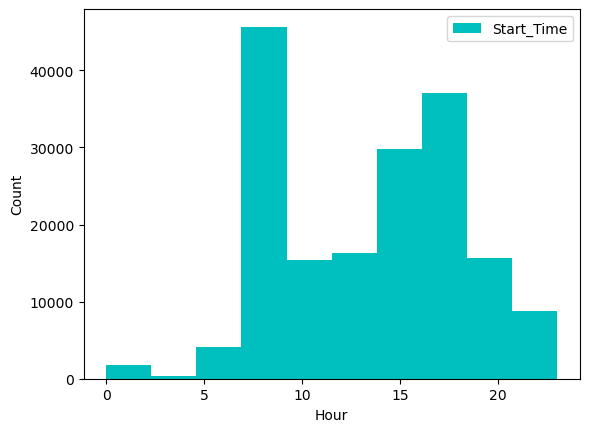

In [18]:
plt.hist(ford['Start_Time'].dt.hour,color='c',label='Start_Time')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()

**This data show the number is few from 12 am to 5 am and start to be more after that to 12 am and this per day**

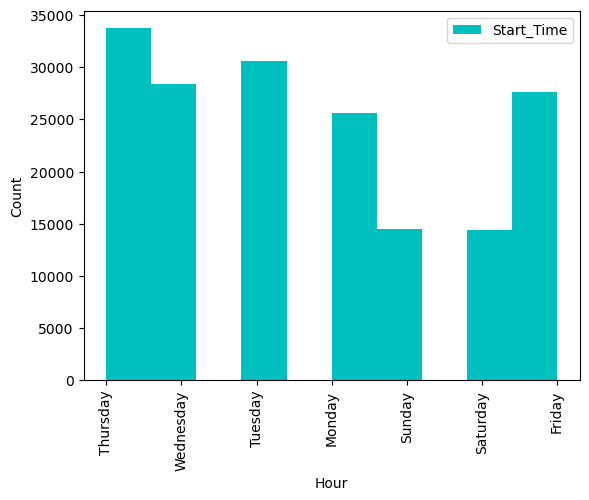

In [19]:
plt.hist(ford['Start_Time'].dt.day_name(),color='c',label='Start_Time')

plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend()
plt.show()

**This data show the number is few on sunday and saturday and be more on thursday and tuesday and more another day also**

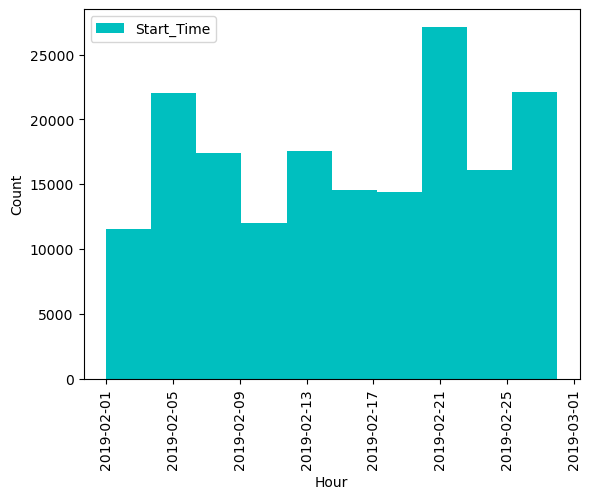

In [20]:
plt.hist(ford['Start_Time'].dt.date,color='c',label='Start_Time')

plt.xlabel('Hour')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend()
plt.show()

**Shows all the periods**

**Q2 what is gender and age beakdown of rides?**

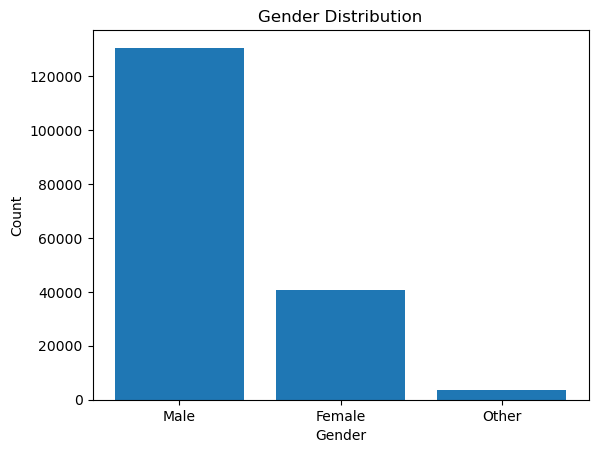

In [21]:
gender_counts = ford['Member_Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

**Q3 how long do ride goers rent a bike and respect the age?**

In [22]:
grouped_birth_yead = ford.groupby('Member_Birth_Year')['Duration_Hour']
birth_yead_agg = grouped_birth_yead.agg(['mean','count','max'])

In [23]:
birth_yead_agg

,mean,count,max
Member_Birth_Year,,,
1878.0,0.409444,1,0.409444
1900.0,0.192683,53,0.525833
1901.0,0.125370,6,0.149722
1902.0,0.141035,11,0.189167
1910.0,0.201944,1,0.201944
...,...,...,...
1997.0,0.179899,3476,14.302222
1998.0,0.201489,3208,22.920000
1999.0,0.179260,2504,4.873889


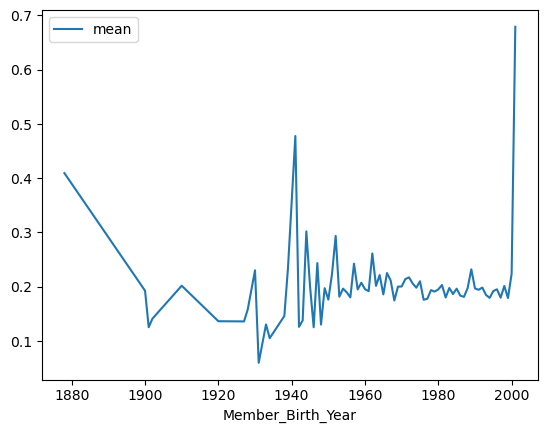

In [24]:
birth_yead_agg.plot(y='mean')
plt.show()

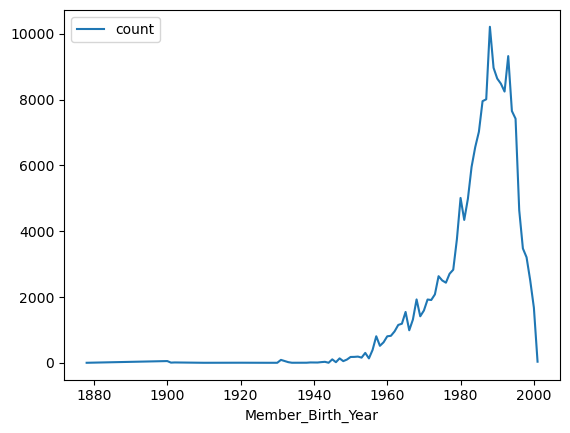

In [25]:
birth_yead_agg.plot(y='count')
plt.show()